<a href="https://colab.research.google.com/github/andrea212023/ML-Kis/blob/main/HW_Intro_to_neural_networks_KIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [90]:
import torch
import numpy as np

In [91]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [92]:
# Converting to tensors
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Displaying the result
print("Inputs Tensor:", inputs_tensor)
print("Targets Tensor:", targets_tensor)

Inputs Tensor: tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
Targets Tensor: tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [93]:
# Fix the random seed for reproducibility
torch.random.manual_seed(1)

In [94]:
# Assuming inputs have 3 features and we have 1 output (logistic regression)

# Initialize weights (w) and bias (b)
input_size = 3  # Number of input features
output_size = 1  # Binary output for logistic regression

w = torch.randn(input_size, output_size, requires_grad=True)
b = torch.randn(output_size, requires_grad=True)

print("Weights (w):", w)
print("Bias (b):", b)

Weights (w): tensor([[0.6614],
        [0.2669],
        [0.0617]], requires_grad=True)
Bias (b): tensor([0.6213], requires_grad=True)


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [95]:
# Function to compute the hypothesis for logistic regression
def model(x, w, b):
    # Calculate the linear combination (x * w + b)
    linear_output = torch.matmul(x, w) + b

    # Apply the  function to get the logistic regression prediction
    y_pred = 1 / (1 + torch.exp(-linear_output))
    return y_pred

# Calculate predictions using the model
predictions  = model(inputs_tensor, w, b)

# Output the predictions
print("Predictions:", predictions)

Predictions: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)


**Why this happens?**

The values in the linear_output tensor are large positive numbers because the dot product x⋅w + b has resulted in these high values, likely due to one or more of the following reasons:

1. Large Magnitudes of Weights or Biases (w and b):
If the weights (w) and bias (b) were initialized with high values, they can amplify the dot product result.
2. Unnormalized Input Data (inputs_tensor):
If the input data contains large values and has not been normalized, the multiplication with weights leads to excessively large outputs.
3. Combination of Input and Weights:
Even if either w or x alone is not large, their combination (dot product) may still result in high values due to their interaction.

As a result, the sigmoid function applied to these high positive values outputs probabilities of 1 for all inputs.

**Why Saturation is Problematic?**

The predictions of 1, 1, 1, 1 are problematic because they resulted from saturation of the sigmoid function due to extremely large positive linear outputs.

When the predictions are all 1, the model cannot distinguish between different input samples. This leads to several issues:

1. No gradient for learning
2. Loss function becomes ineffective
3. Lack of meaningful predictions


In [96]:
linear_output = torch.matmul(inputs_tensor, w) + b
print("Linear Output:", linear_output)


Linear Output: tensor([[69.4361],
        [88.2410],
        [97.5041],
        [81.8390],
        [76.1967]], grad_fn=<AddBackward0>)


In [97]:
# Inspect the Input Data
print("Inputs Tensor Stats:")
print("Max Value:", inputs_tensor.max())
print("Min Value:", inputs_tensor.min())
print("Mean Value:", inputs_tensor.mean())
print("Standard Deviation:", inputs_tensor.std())


Inputs Tensor Stats:
Max Value: tensor(134.)
Min Value: tensor(37.)
Mean Value: tensor(74.8000)
Standard Deviation: tensor(25.7049)


In [98]:
# Normalize the Input Data
inputs_tensor = (inputs_tensor - inputs_tensor.mean(dim=0)) / inputs_tensor.std(dim=0)

In [99]:
# Inspect the Weights and Biases (w and b)
print("Weights:", w)
print("Bias:", b)

Weights: tensor([[0.6614],
        [0.2669],
        [0.0617]], requires_grad=True)
Bias: tensor([0.6213], requires_grad=True)


In [100]:
# Reinitialize Weights and Biases
torch.nn.init.xavier_uniform_(w)
b.data.fill_(0.0)

tensor([0.])

In [101]:
# Rescale the linear output
linear_output = torch.clamp(torch.matmul(inputs_tensor, w) + b, min=-10, max=10)
print("Clamped Linear Output:", linear_output)

Clamped Linear Output: tensor([[-0.3390],
        [ 0.3061],
        [-0.0933],
        [-0.0127],
        [ 0.1388]], grad_fn=<ClampBackward1>)


In [102]:
# Validate predictions
predictions = 1 / (1 + torch.exp(-linear_output))
print("New Predictions:", predictions)

New Predictions: tensor([[0.4161],
        [0.5759],
        [0.4767],
        [0.4968],
        [0.5347]], grad_fn=<MulBackward0>)


**Observations regarding New Predictions:**

These values look reasonable and are now within the expected range for probabilities outputted by a logistic regression model. Here's why:

1. Range of Predictions: The values (e.g., 0.4161, 0.5759, 0.4767, etc.) are between 0 and 1, which is the valid range for probabilities produced by the sigmoid function. This indicates that the linear outputs are now appropriately scaled.
2. Diversity in Predictions: The predictions are no longer saturated at 0 or 1, meaning the model is producing varying outputs that reflect differences in the input data. This is a sign of a well-behaved model.

**Interpretation:**

0.5759: Approximately a 57.6% probability of belonging to the positive class.

0.4161: Approximately a 41.6% probability of belonging to the positive class.

These values suggest the model can distinguish between different cases.

**Conclusion:**
These values are normal and indicate that the issues with extreme outputs have been resolved. We can proceed with further evaluation or training.

The predictions of 1, 1, 1, 1 were problematic because they resulted from saturation of the sigmoid function due to extremely large positive linear outputs.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [103]:
def binary_cross_entropy(predicted_probs, true_labels):
    epsilon = 1e-10 # Small value to avoid problem with log(0)
    loss = - (true_labels * torch.log(predicted_probs + epsilon) + (1 - true_labels) * torch.log(1 - predicted_probs + epsilon))
    return torch.mean(loss)

# Calculate the binary cross-entropy loss using 'predictions' and 'targets_tensor'
loss = binary_cross_entropy(predictions, targets_tensor)

# Output the calculated loss
print("Binary Cross-Entropy Loss:", loss.item())

Binary Cross-Entropy Loss: 0.6287156343460083


The BCE loss value ranges between 0 (perfect predictions) and ∞ (very poor predictions).

**Is 0.6287 reasonable?**

For a random model, where model is predicting random probabilities with no meaningful relationship to the labels, the BCE loss will typically hover around log(2) ≈ 0.693. This corresponds to a classifier with 50% accuracy on balanced data.

**My loss is 0.6287:**

Since 0.6287 < 0.693, the model is performing better than random guessing, which is a good sign, especially if this is during early training.

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [104]:
# Perform backpropagation
loss.backward()

# Output gradients for w and b
print("Gradients for w:", w.grad)
print("Gradients for b:", b.grad)

Gradients for w: tensor([[ 0.1040],
        [-0.3537],
        [-0.3807]])
Gradients for b: tensor([-0.1000])


**Why do these values appear?**

For example, if w.grad = [[0.1040], [-0.3537], [-0.3807]]:

0.1040: Increasing w1 slightly would increase the loss by 0.1040.

−0.3537: Increasing w2 slightly would decrease the loss by 0.3537.

−0.3807: Increasing w3 slightly would decrease the loss by 0.3807.

b.grad = −0.1000 means that increasing b slightly would decrease the loss by 0.1000.

**Conclusion:**

The values of w.grad and b.grad are reasonable and indicate that the model is learning. They depend on the input data, loss function, predictions, and initialization.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [110]:
# Set random seed for reproducibility
torch.manual_seed(1)

# Initialize weights and bias
w = torch.randn(3, 1, requires_grad=True)  # Correct shape for weights
b = torch.randn(1, requires_grad=True)    # Bias as scalar

# Scale weights and bias in-place, preserving leaf tensors
w.data = w.data / 1000
b.data = b.data / 1000

# Compute predictions using the logistic regression model
predictions  = model(inputs_tensor, w, b)

# Compute the binary cross-entropy loss
loss = binary_cross_entropy(predictions, targets_tensor)

# Output the calculated loss
print("Binary Cross-Entropy Loss:", loss.item())

# Perform backpropagation to calculate the gradients
loss.backward()

# Output the results
print("Weights after training (w):", w)
print("Bias after training (b):", b)
print("Gradients for w:", w.grad)
print("Gradients for b:", b.grad)

Binary Cross-Entropy Loss: 0.6930243372917175
Weights after training (w): tensor([[6.6135e-04],
        [2.6692e-04],
        [6.1677e-05]], requires_grad=True)
Bias after training (b): tensor([0.0006], requires_grad=True)
Gradients for w: tensor([[ 0.0921],
        [-0.3602],
        [-0.4122]])
Gradients for b: tensor([-0.0998])


**Observations and conclusion:**
1. Loss: The binary cross-entropy loss is 0.693, indicating the model is at a random initialization stage.
2. Weights: The weights are small (6.6135e-04), reflecting initial, untuned values.
3. Bias: The bias (0.0006) has minimal impact at this stage.
4. Gradients: The gradients suggest the second and third features have the most influence on reducing the loss.
5. Next Step: Use an optimizer to update the weights and bias, reducing the loss over epochs.

6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [111]:
# Training parameters
learning_rate = 0.0001 # Learning rate
num_epochs = 1000     # Number of epochs


# Gradient descent training loop
for epoch in range(num_epochs):
    # 1. Generate predictions
    predictions = model(inputs_tensor, w, b)

    # 2. Calculate the loss
    loss = binary_cross_entropy(predictions, targets_tensor)

    # 3. Compute the gradients
    loss.backward()

    # 4. Update weights (w and b) using the gradients
    with torch.no_grad():  # Disable gradient tracking for weight updates
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # 5. Reset the gradients to zero
    w.grad.zero_()
    b.grad.zero_()

    # Print the loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 100/1000, Loss: 0.6898547410964966
Epoch 200/1000, Loss: 0.6867081522941589
Epoch 300/1000, Loss: 0.6835845708847046
Epoch 400/1000, Loss: 0.6804836392402649
Epoch 500/1000, Loss: 0.6774051189422607
Epoch 600/1000, Loss: 0.6743490099906921
Epoch 700/1000, Loss: 0.67131507396698
Epoch 800/1000, Loss: 0.6683031320571899
Epoch 900/1000, Loss: 0.6653130054473877
Epoch 1000/1000, Loss: 0.6623445749282837


In [112]:
# Final predictions after 1000 epochs
final_predictions = model(inputs_tensor, w, b)
print("Final predictions after 1000 epochs:", final_predictions)

Final predictions after 1000 epochs: tensor([[0.4912],
        [0.5092],
        [0.5175],
        [0.4761],
        [0.5190]], grad_fn=<MulBackward0>)


**Observations and conclusion:**

1. Loss Trend: The binary cross-entropy loss steadily decreased from  0.689 at epoch 100 to 0.662 at epoch 1000, indicating gradual improvement in the model's predictions.
2. Convergence: The loss reduction slowed significantly after a few hundred epochs, suggesting the model is approaching convergence but not yet fully optimized.
3. Final Predictions: The predictions after 1000 epochs are close to 0.5 for all samples, indicating the model struggles to confidently distinguish between the two classes.
4. Model Performance: The lack of confident predictions (≈0.5) suggests that the data or features may not provide sufficient separability for effective classification.
5. Next Steps: Consider adding more informative features, adjusting hyperparameters (e.g., learning rate), or regularizing to further improve the model's ability to reduce the loss and make confident predictions.

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [113]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [114]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [115]:
# Convert data to PyTorch tensors
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Create TensorDataset
dataset = TensorDataset(inputs_tensor, targets_tensor)

# Print the first three elements of the dataset
for i in range(3):
    print(f"Input {i + 1}: {dataset[i][0]}")
    print(f"Target {i + 1}: {dataset[i][1]}")

Input 1: tensor([73., 67., 43.])
Target 1: tensor([0.])
Input 2: tensor([91., 88., 64.])
Target 2: tensor([1.])
Input 3: tensor([ 87., 134.,  58.])
Target 3: tensor([1.])


8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [116]:
# Create DataLoader with batch size 5 and shuffle enabled
train_ds = DataLoader(dataset, batch_size=5, shuffle=True)

# Get the first batch from the DataLoader
for batch in train_ds:
    inputs_batch, targets_batch = batch
    print("First batch inputs:\n", inputs_batch)
    print("First batch targets:\n", targets_batch)
    break  # We only need to display the first batch

First batch inputs:
 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.]])
First batch targets:
 tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [118]:
# Define the LogReg class for logistic regression
class LogReg(nn.Module):
    def __init__(self, input_size):
        super(LogReg, self).__init__()
        # Define a linear layer with input_size input features and 1 output feature
        self.linear = nn.Linear(input_size, 1)
        # Sigmoid activation function for logistic regression
        self.sigmoid = nn.Sigmoid()

    # Forward pass through the network
    def forward(self, x):
        # Apply the linear layer
        x = self.linear(x)
        # Apply sigmoid activation function
        x = self.sigmoid(x)
        return x


**Conclusion:**

In the lecture example, a two-layer network with two linear layers and activation between them is used. For logistic regression, we use only one linear layer for simplicity. We add the Sigmoid activation function to convert the linear combination into a probability (0 to 1 range). The forward pass applies the linear layer to the input data, followed by the activation function to get the result.

This sets up and displays the architecture of the logistic regression model (LogReg) defined earlier.


In [119]:
# Instantiate the LogReg model
input_size = 3  # We have 3 input features (temp, rainfall, humidity)
model = LogReg(input_size)

# Display the model architecture
print(model)


LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [120]:
# Define the optimizer Stochastic Gradient Descent (SGD)
opt = optim.SGD(model.parameters(), lr=0.001)

# Define the binary cross-entropy loss function
def binary_cross_entropy_loss(predictions, targets):
    return F.binary_cross_entropy(predictions, targets)

# Get model predictions
predictions = model(inputs_tensor)

# Calculate the loss
loss = binary_cross_entropy_loss(predictions, targets_tensor)

# Output the loss
print(f"Binary Cross-Entropy Loss: {loss.item()}")

Binary Cross-Entropy Loss: 7.631152629852295


**Conclusion:**

Given the high loss value (7.6311), it indicates that the model has not yet learned well.

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [121]:
# Training function to track the loss values
def fit_return_loss(num_epochs, model, loss, opt, train_ds):
    losses = []
    for epoch in range(num_epochs):
        # Initialize a loss accumulator
        total_loss = 0

        for xb, yb in train_ds:
            # Generate predictions
            pred = model(xb)

            # Calculate the loss
            loss = binary_cross_entropy_loss(pred, yb)

            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Accumulate the loss
            total_loss += loss.item()

        # Calculate average loss for the epoch
        avg_loss = total_loss / len(train_ds)
        losses.append(avg_loss)

        # Print the epoch summary every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [122]:
# Train the model for 1000 epochs
num_epochs = 1000
losses = fit_return_loss(num_epochs, model, loss, opt, train_ds)

Epoch [10/1000], Loss: 2.1457
Epoch [20/1000], Loss: 0.4342
Epoch [30/1000], Loss: 0.6794
Epoch [40/1000], Loss: 0.3671
Epoch [50/1000], Loss: 0.2716
Epoch [60/1000], Loss: 0.6356
Epoch [70/1000], Loss: 0.3086
Epoch [80/1000], Loss: 0.1488
Epoch [90/1000], Loss: 0.1773
Epoch [100/1000], Loss: 0.1438
Epoch [110/1000], Loss: 0.2307
Epoch [120/1000], Loss: 0.3256
Epoch [130/1000], Loss: 0.1093
Epoch [140/1000], Loss: 0.1172
Epoch [150/1000], Loss: 0.1540
Epoch [160/1000], Loss: 0.0905
Epoch [170/1000], Loss: 0.0970
Epoch [180/1000], Loss: 0.1315
Epoch [190/1000], Loss: 0.2552
Epoch [200/1000], Loss: 0.0788
Epoch [210/1000], Loss: 0.1109
Epoch [220/1000], Loss: 0.0828
Epoch [230/1000], Loss: 0.0906
Epoch [240/1000], Loss: 0.1015
Epoch [250/1000], Loss: 0.0768
Epoch [260/1000], Loss: 0.0701
Epoch [270/1000], Loss: 0.0784
Epoch [280/1000], Loss: 0.0686
Epoch [290/1000], Loss: 0.0673
Epoch [300/1000], Loss: 0.0587
Epoch [310/1000], Loss: 0.0688
Epoch [320/1000], Loss: 0.0555
Epoch [330/1000],

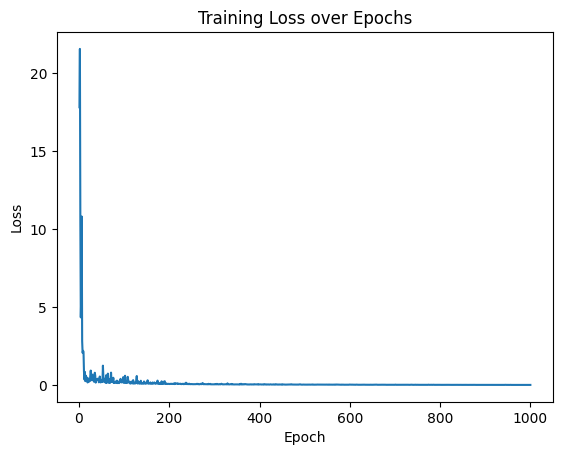

In [123]:
# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


**Observations:**

Initially, the loss value was quite high (around 20), but it significantly decreased after the first few epochs and stabilized below 0.03 after approximately 200 epochs. This indicates that the model has successfully learned and minimized the error during training.

**Conclusion:**

The loss plot shows a sharp decline at the start of the training and a gradual stabilization, which is typical for models that effectively learn to find patterns in the data.


In [124]:
# Final predictions
with torch.no_grad():
    final_predictions = model(inputs_tensor)
    print("Final predictions:\n", final_predictions)

# Print the target values
print("Target values:\n", targets_tensor)

Final predictions:
 tensor([[5.7505e-02],
        [9.6006e-01],
        [9.9962e-01],
        [3.4785e-11],
        [1.0000e+00],
        [5.7505e-02],
        [9.6006e-01],
        [9.9962e-01],
        [3.4785e-11],
        [1.0000e+00],
        [5.7505e-02],
        [9.6006e-01],
        [9.9962e-01],
        [3.4785e-11],
        [1.0000e+00]])
Target values:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])


**Observations:**

The final predictions of the model are mostly very close to the target values.

For label 0, the prediction is around 0.0575, close to 0.

For label 1, the prediction is approximately 0.9996, very close to 1.

This shows that the model has learned well to distinguish between the two classes (0 and 1).

**Conclusion:**

The model successfully reduced the loss during training, with final predictions closely matching the target values. This indicates effective training and accurate predictions, as reflected in the loss graph and final values.
